# MNIST Handwritten Digit Classification with CNN (TensorFlow)

This notebook builds a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset.  
Goals:
- Achieve >95% test accuracy
- Visualize predictions on 5 sample images

In [1]:
#imports
import tensorflow as tf
layers = tf.keras.layers
models = tf.keras.models
import matplotlib.pyplot as plt

In [2]:
#data loading and preprocessing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train[..., tf.newaxis] / 255.0
x_test = x_test[..., tf.newaxis] / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step


In [3]:
#building the model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
#compiling and training the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9523 - loss: 0.1519 - val_accuracy: 0.9823 - val_loss: 0.0622
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.9840 - loss: 0.0511 - val_accuracy: 0.9888 - val_loss: 0.0399
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9891 - loss: 0.0342 - val_accuracy: 0.9900 - val_loss: 0.0325
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9918 - loss: 0.0257 - val_accuracy: 0.9903 - val_loss: 0.0326
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9931 - loss: 0.0202 - val_accuracy: 0.9907 - val_loss: 0.0358


In [5]:
#Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predicted labels
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print classification report
print(classification_report(y_test, y_pred, digits=4))

# Optional: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0     0.9869    0.9969    0.9919       980
           1     0.9921    0.9903    0.9912      1135
           2     0.9762    0.9932    0.9846      1032
           3     0.9911    0.9891    0.9901      1010
           4     0.9919    0.9929    0.9924       982
           5     0.9954    0.9798    0.9876       892
           6     0.9968    0.9864    0.9916       958
           7     0.9903    0.9912    0.9908      1028
           8     0.9817    0.9908    0.9862       974
           9     0.9930    0.9822    0.9875      1009

    accuracy                         0.9894     10000
   macro avg     0.9895    0.9893    0.9894     10000
weighted avg     0.9895    0.9894    0.9894     10000

Confusion Matrix:
 [[ 977    0    0    0    0    0    1    1    1    0]
 [   2 1124    4    0    0    0    1    0    4    0]
 [   1    1 1025    0    0    0    0    4    1    0]
 [   0    0    7  999 

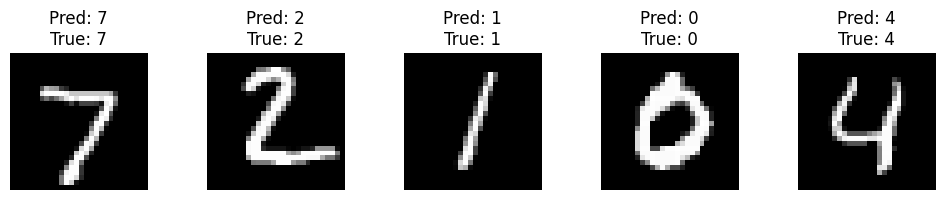

In [6]:
#visualizing handwriting samples
# Visualize 5 sample predictions
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
import pyttsx3

engine = pyttsx3.init()
for i in range(5):
    digit = y_pred[i]
    print(f"Speaking: {digit}")
    engine.say(str(digit))
    engine.runAndWait()

Speaking: 7
Speaking: 2
Speaking: 1
Speaking: 0
Speaking: 4
